c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

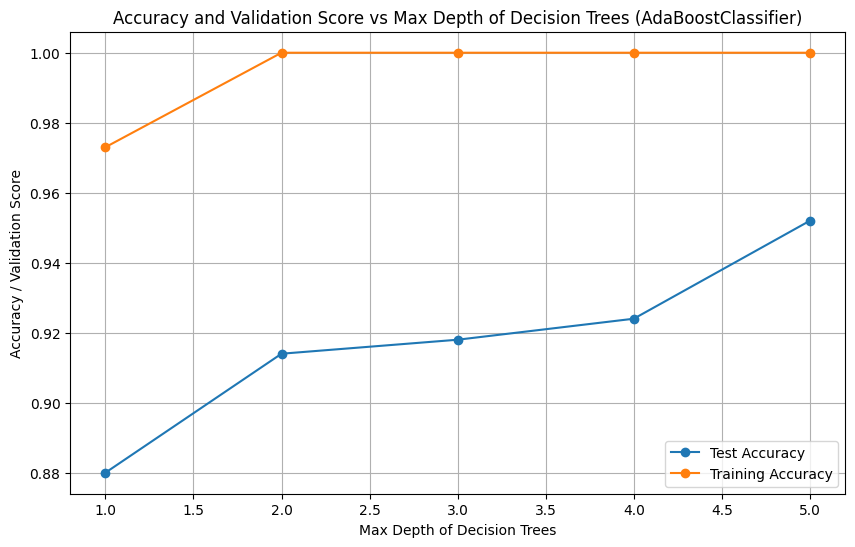

Max Depth of Decision Trees: 5, Test Accuracy: 0.952, Training Accuracy: 1.0


In [1]:
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

BASE_DIR = Path.cwd()
data = np.load("../Hyperparameters/yaleExtB_data.npy")
target = np.load("../Hyperparameters/yaleExtB_target.npy")

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=1/3)

accuracies = []
validation_scores = []  # Storing validation scores
max_depth_values = []

for max_depth in range(1, 6):
    # Define and train AdaBoostClassifier with DecisionTreeClassifier as base estimator
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth, max_features='log2'), 
                                 n_estimators=500, learning_rate=1.0, algorithm='SAMME.R')
    ada_clf.fit(x_train, y_train)
    # Calculate accuracy on test set
    accuracy = ada_clf.score(x_test, y_test)
    accuracies.append(accuracy)
    # Calculate validation score on training set
    validation_score = ada_clf.score(x_train, y_train)
    validation_scores.append(validation_score)
    max_depth_values.append(max_depth)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracies, marker='o', linestyle='-', label='Test Accuracy')
plt.plot(max_depth_values, validation_scores, marker='o', linestyle='-', label='Training Accuracy')
plt.title('Accuracy and Validation Score vs Max Depth of Decision Trees (AdaBoostClassifier)')
plt.xlabel('Max Depth of Decision Trees')
plt.ylabel('Accuracy / Validation Score')
plt.legend()
plt.grid(True)
plt.show()

print(f"Max Depth of Decision Trees: {max_depth}, Test Accuracy: {accuracy}, Training Accuracy: {validation_score}")


In [2]:
from sklearn.metrics import classification_report
y_pred = ada_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        17
         3.0       0.90      0.90      0.90        10
         4.0       0.95      1.00      0.98        20
         5.0       1.00      1.00      1.00        16
         6.0       0.94      0.94      0.94        16
         7.0       0.94      1.00      0.97        15
         8.0       1.00      0.91      0.95        22
         9.0       1.00      1.00      1.00        11
        11.0       0.83      1.00      0.90        19
        12.0       1.00      0.96      0.98        23
        13.0       1.00      0.95      0.98        22
        15.0       1.00      0.87      0.93        15
        16.0       1.00      0.86      0.92        21
        17.0       0.85      0.79      0.81        14
        18.0       0.95      1.00      0.97        19
        20.0       0.92      0.92      0.92        13
        22.0       1.00      0.95      0.98        21
        23.0       1.00    